In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [136]:
# get the random data generated 100 + 100 data points in 2D
data1 = np.random.rand(1000,2)
data2= 1 + np.random.rand(1000,2)
data = np.concatenate((data1, data2))


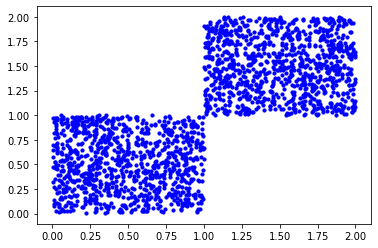

In [137]:
# display the data
#data
plt.scatter(data[ : , 0], data[ :, 1], s = 10, c = 'b')

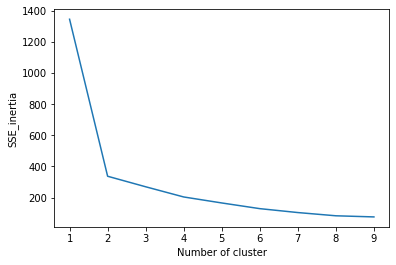

In [138]:
# plot Elbow method, using sum of distance
# Inertia: It is the sum of squared distances of samples to their closest cluster center.
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1000, max_iter=10000, precompute_distances=True, n_jobs=-1).fit(data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE_inertia")
plt.show()

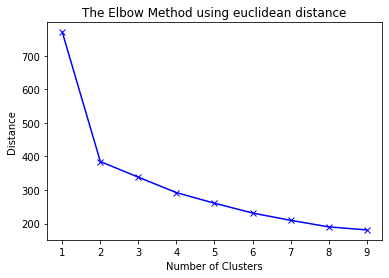

In [139]:
# The Elbow Method using euclidean distance
distance=[]
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1000, max_iter=10000, precompute_distances=True, n_jobs=-1).fit(data)
    kmeans.fit(data)
    distance.append(sum(np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'),axis=1)) / data.shape[1]) 

plt.plot(K, distance, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distance')
plt.title('The Elbow Method using euclidean distance') 
plt.show()

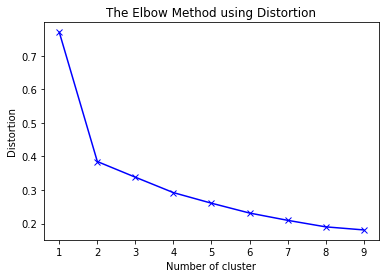

In [140]:
# plot elbow method using 
# Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective clusters. 
# Typically, the Euclidean distance metric is used.
sse_dis = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1000, max_iter=10000, precompute_distances=True, n_jobs=-1).fit(data)
    sse_dis[k] = sum(np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'),axis=1)) / data.shape[0] 
plt.figure()
plt.plot(list(sse_dis.keys()), list(sse_dis.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Distortion")
plt.title('The Elbow Method using Distortion') 
plt.show()

In [141]:
# make cluster k=2 and plot the graph
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=1000, max_iter=10000, precompute_distances=True, n_jobs=-1)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=2, n_init=1000, n_jobs=-1, precompute_distances=True,
       random_state=None, tol=0.0001, verbose=0)

In [142]:
centroids = kmeans.cluster_centers_
print(centroids[: , 0])
print(centroids[: , 1])

[0.47701393 1.49670211]
[0.51082985 1.49987523]


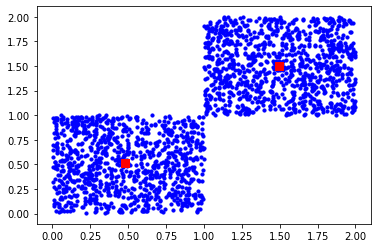

In [143]:
# display the data with centriods
#data
plt.scatter(data[ : , 0], data[ :, 1], s = 10, c = 'b')
# centriods
plt.scatter(centroids[: , 0], centroids[: , 1], s = 50, c = 'r', marker = 's')

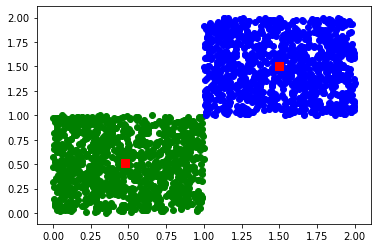

In [144]:
plt.scatter(data[kmeans.labels_ == 0, 0], data[kmeans.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(data[kmeans.labels_ == 1, 0], data[kmeans.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[: , 0], centroids[: , 1], s = 50, c = 'r', marker = 's')

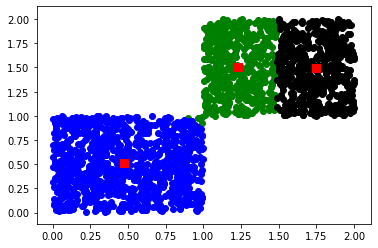

In [147]:
# try using the k = 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=1000, max_iter=10000, precompute_distances=True, n_jobs=-1)
kmeans.fit(data)
centroids = kmeans.cluster_centers_
plt.scatter(data[kmeans.labels_ == 0, 0], data[kmeans.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(data[kmeans.labels_ == 1, 0], data[kmeans.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(data[kmeans.labels_ == 2, 0], data[kmeans.labels_ == 2, 1],
            c='black', label='cluster 3')
plt.scatter(centroids[: , 0], centroids[: , 1], s = 50, c = 'r', marker = 's')

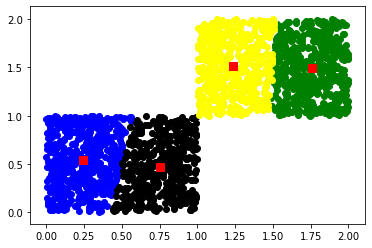

In [148]:
# try using the k = 4
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=1000, max_iter=10000, precompute_distances=True, n_jobs=-1)
kmeans.fit(data)
centroids = kmeans.cluster_centers_
plt.scatter(data[kmeans.labels_ == 0, 0], data[kmeans.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(data[kmeans.labels_ == 1, 0], data[kmeans.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(data[kmeans.labels_ == 2, 0], data[kmeans.labels_ == 2, 1],
            c='black', label='cluster 3')
plt.scatter(data[kmeans.labels_ == 3, 0], data[kmeans.labels_ == 3, 1],
            c='yellow', label='cluster 4')
plt.scatter(centroids[: , 0], centroids[: , 1], s = 50, c = 'r', marker = 's')